In [5]:
import os
from IPython.display import display
from PIL import Image

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F #gives us some util functions

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

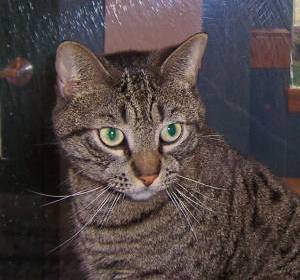

In [7]:
with Image.open('/root/projects/data_set/cat_dog/train/cat/1.jpg') as im:
    display(im) #display is for any images....

In [8]:
#so if we want to display all images, we need to know the filename....
#so here we can use `os`
path = '/root/projects/data_set/cat_dog'

imagenames = []
for folder, subfolders, filenames in os.walk(path):
    for img in filenames:
        imagenames.append(folder + "/" + img)

imagenames[:5]
len(imagenames)

25000

In [9]:
img_sizes = []
rejected_image = []

#i believe there are some invalid images......
#to fix UnidentifiedImageError, we need to use try and catch and except
for image in imagenames:
    try:
        with Image.open(image) as im:
            img_sizes.append(im.size)
    except:
        rejected_image.append(image)
        
# print(img_sizes[:5])
# print(len(rejected_image))
# print(rejected_image[:5])

In [10]:
img_sizes[0]

(431, 359)

In [11]:
df = pd.DataFrame(img_sizes, columns = ['width', 'height'])
df.head()

,width,height
0,431,359
1,500,374
2,499,471
3,499,375
4,320,239


In [12]:
print(df['width'].describe())
print(df['height'].describe())

count    25000.00000
mean       404.09904
std        109.03793
min         42.00000
25%        323.00000
50%        447.00000
75%        499.00000
max       1050.00000
Name: width, dtype: float64
count    25000.000000
mean       360.478080
std         97.019959
min         32.000000
25%        301.000000
50%        374.000000
75%        421.000000
max        768.000000
Name: height, dtype: float64


# Transformation

(499, 375)


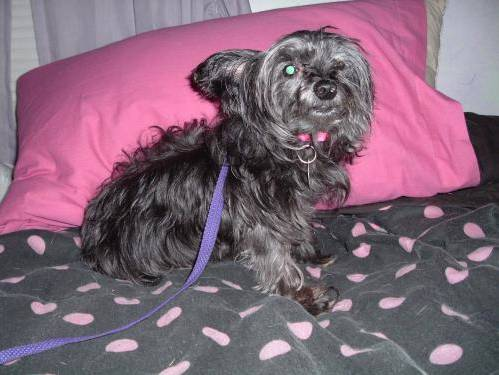

In [14]:
dog = Image.open('/root/projects/data_set/cat_dog/train/dog/0.jpg')
print(dog.size)
display(dog)

In [15]:
#getpixel
r, g, b = dog.getpixel((0, 0))
print(r, g, b)

115 113 124


In [16]:
#let's learn about normalization
#Compose is basically allowing you to combine many transformations
transform = transforms.Compose([
    transforms.ToTensor()
])

In [17]:
print(dog.size) #W, H

(499, 375)


In [18]:
im = transform(dog)
type(im) #so you can see now that im is now a tensor

torch.Tensor

In [19]:
print(im.shape) #C, H, W

torch.Size([3, 375, 499])


In [21]:
im[:,0,0]

tensor([0.4510, 0.4431, 0.4863])

In [22]:
im = im.permute((1, 2, 0)) #for plt.imshow(H, W, C)
im.shape

torch.Size([375, 499, 3])

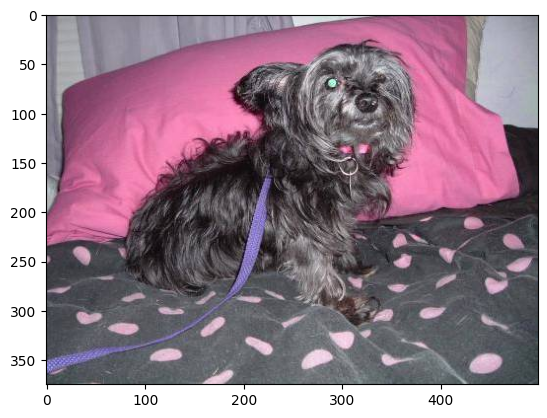

In [23]:
plt.imshow(im)

## Resize

In [24]:
tnnydog = Image.open('/root/projects/data_set/cat_dog/train/dog/10.jpg')


(269, 292)


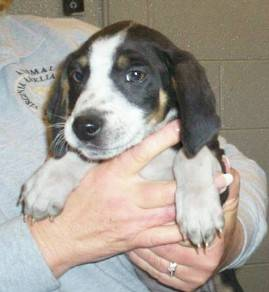

In [26]:
print(tnnydog.size)
display(tnnydog)

In [31]:
# tnnydog.size

(269, 292)

In [37]:
tranformand_resize = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(600)
    ]
)

torch.Size([3, 651, 600])

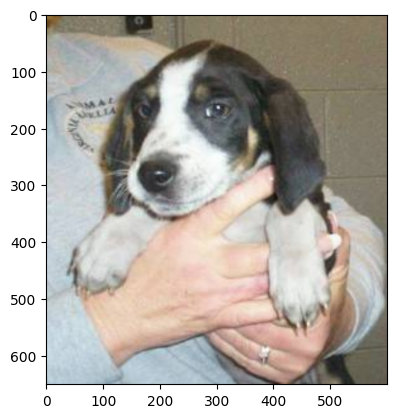

In [38]:
im = tranformand_resize(tnnydog)
im.permute((1,2,0))
plt.imshow(im.permute((1,2,0)))
im.shape

In [35]:
tranformand_resize2 = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(600),
    transforms.CenterCrop(224)
    ]
)

torch.Size([3, 224, 224])

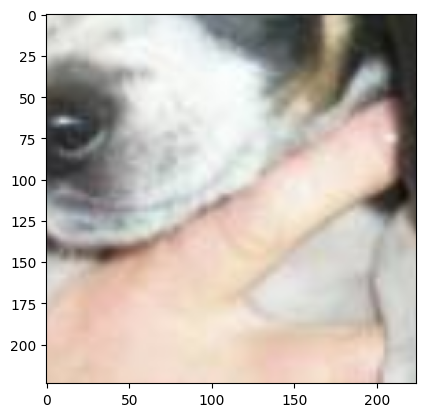

In [36]:
im = tranformand_resize2(tnnydog)
im.permute((1,2,0))
plt.imshow(im.permute((1,2,0)))
im.shape

In [39]:
# very common technique to zoom in something 
tranformand_resize3 = transforms.Compose([

    transforms.Resize(1000),
    transforms.CenterCrop(600),
    transforms.ToTensor()
    ]
)

In [40]:
# very common technique to zoom in something 
tranformand_resize3 = transforms.Compose([
    transforms.RandomHorizontalFlip()  # maybe p = 0.5
    ,    
    transforms.ToTensor()
    ]
)

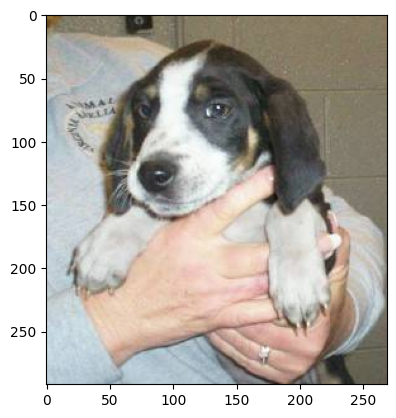

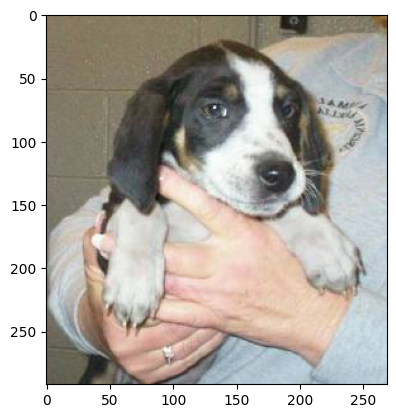

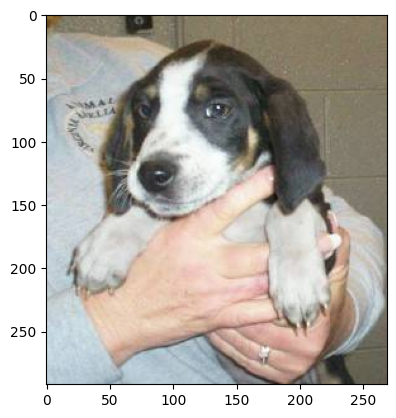

In [42]:
for _ in range(3):
    im = tranformand_resize3(tnnydog)
    im.permute((1,2,0))
    plt.imshow(im.permute((1,2,0)))
    plt.show()
    im.shape

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 292, 269])

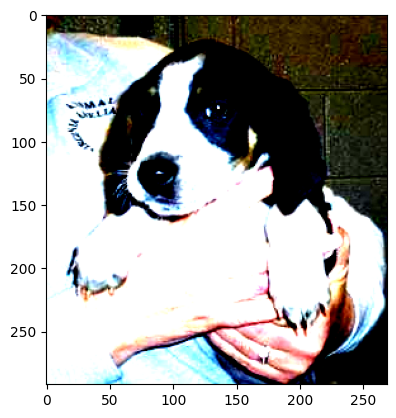

In [43]:
# very common technique to zoom in something 
tranformand_resize4 = transforms.Compose([   
    transforms.ToTensor()
    ,
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
    ]
)

im = tranformand_resize4(tnnydog)
im.permute((1,2,0))
plt.imshow(im.permute((1,2,0)))
im.shape